# Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 0. Importing data

Data source: https://www.kaggle.com/competitions/GiveMeSomeCredit

In [2]:
credit_data = pd.read_csv("cs-training.csv")
credit_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
credit_data.drop(columns=['Unnamed: 0'], inplace=True)

# 1. Data Preprocessing

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
# check for any duplicates

credit_data[credit_data.duplicated(keep=False)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
52,0,1.0,62,0,0.0,NaN,1,0,0,0,0.0
331,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
530,0,0.0,82,0,0.0,NaN,3,0,0,0,0.0
1250,0,0.0,84,0,0.0,NaN,1,0,0,0,0.0
1669,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149139,0,0.0,77,0,0.0,NaN,2,0,0,0,0.0
149431,0,1.0,25,0,0.0,NaN,1,0,0,0,NaN
149472,0,1.0,84,0,0.0,NaN,1,0,0,0,0.0
149769,0,1.0,23,98,0.0,NaN,0,98,0,98,NaN


There are null values in the MonthlyIncome and NumberOfDependents columns.

There are duplicated observations.

In [6]:
credit_data.drop_duplicates(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = credit_data,
                          target_column = "SeriousDlqin2yrs")

In [9]:
# the proportion of rejected credit
y.mean()

0.06699868131279663

In [10]:
# split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 20230703)

## 1(a) Treating NumberOfDependents

In [11]:
# imputing NumberOfDependents

num_dependents_mode = float(X_train["NumberOfDependents"].mode())
col = "NumberOfDependents"

for dataset in [X_train, X_test]:
    dataset[col] = dataset[col].fillna(num_dependents_mode)

## 1(b) Treating MonthlyIncome

It seems that all customers with NaN MonthlyIncome have integer DebtRatio. But to calculate DebtRatio (which is equal to Monthly Debt Payments/Monthly Income), MonthlyIncome is needed. It is safe to assume that for these NaN MonthlyIncome customers, their DebtRatio is in reality just a rough estimate. 

Moreover, these NaN MonthlyIncome customers have large DebtRatio.

Due to this, we may guess that these customers are actually businesses (with no exact monthly income), and that the customers with available MonthlyIncome are actually personal customers.

In [12]:
for data in [X_train, X_test]:
    null_income = data["MonthlyIncome"].isna()
    data["TypeCustomer"] = np.where(null_income, 1, 0)
    # 1 is Business
    # 0 is Personal
    data["MonthlyIncome"] = data["MonthlyIncome"].fillna(0) # fill 0 income for Business

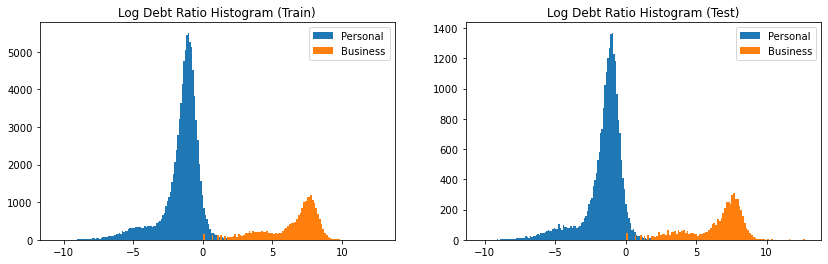

In [13]:
pers = X_train["TypeCustomer"] == 0
personal = pers
nonzero_dr = X_train["DebtRatio"] > 0

fig, ax = plt.subplots(1,2, figsize=(14,4))

for i, dataset in enumerate([X_train, X_test]):
    pers = dataset["TypeCustomer"] == 0
    personal = pers
    nonzero_dr = dataset["DebtRatio"] > 0

    ax[i].hist(x=np.log(dataset[pers & nonzero_dr]["DebtRatio"]), bins=200, label='Personal')
    ax[i].hist(x=np.log(dataset[~pers & nonzero_dr]["DebtRatio"]), bins=100, label='Business')
    ax[i].legend()
    
ax[0].set_title("Log Debt Ratio Histogram (Train)")
ax[1].set_title("Log Debt Ratio Histogram (Test)")
plt.show()

## 2(c) Treating NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse & NumberOfTimes90DaysLate

For these columns, there are observations with extremely large values which doesn't make sense.

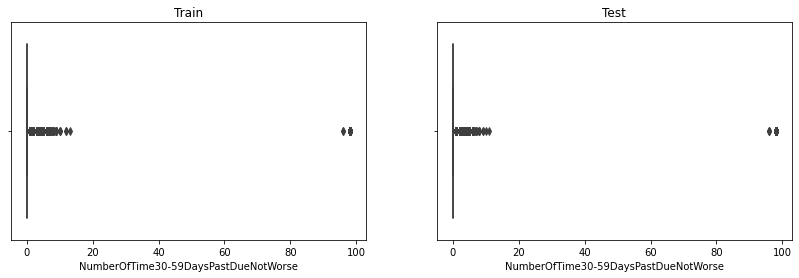

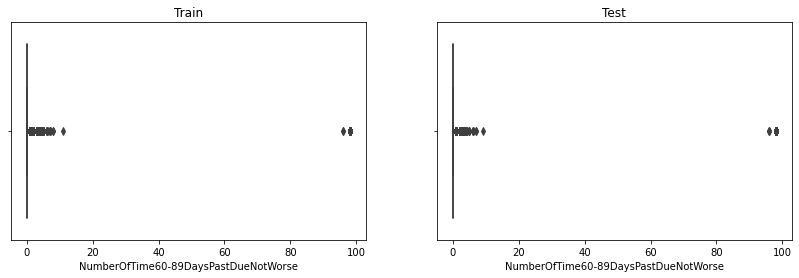

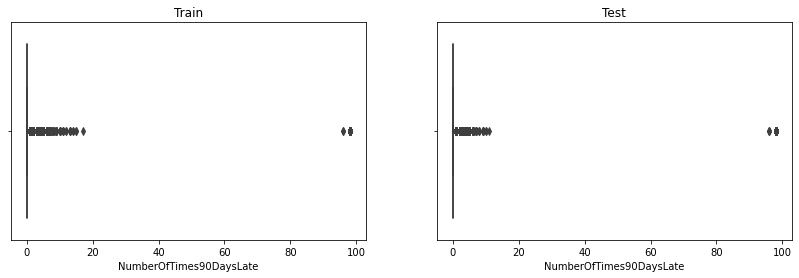

In [14]:
cols = ["NumberOfTime30-59DaysPastDueNotWorse",
        "NumberOfTime60-89DaysPastDueNotWorse",
        "NumberOfTimes90DaysLate"]

for col in cols:
    fig, ax = plt.subplots(1,2, figsize=(14,4))

    for i, dataset in enumerate([X_train, X_test]):
        sns.boxplot(data=dataset, x=col, ax=ax[i])

    ax[0].set_title("Train")
    ax[1].set_title("Test")
    plt.show()

In [15]:
large_val_obs = X_train["NumberOfTime30-59DaysPastDueNotWorse"] > 80
X_train[large_val_obs]["age"].min()

21

It doesn't make any sense for a 21-year-old to have 98 times of 30-59 days past payments $98\times 30/365 = 8.05$; it doesn't make sense for a 21-year-old to have started making credit payment from the age 13. 

For these type of observations, we impute these large values with the mode (which is 0).

In [16]:
for col in cols:

    mode = float(X_train[col].mode())
    for dataset in [X_train, X_test]:
        dataset[col] = np.where(dataset[col] > 20,
                                mode, 
                                dataset[col])

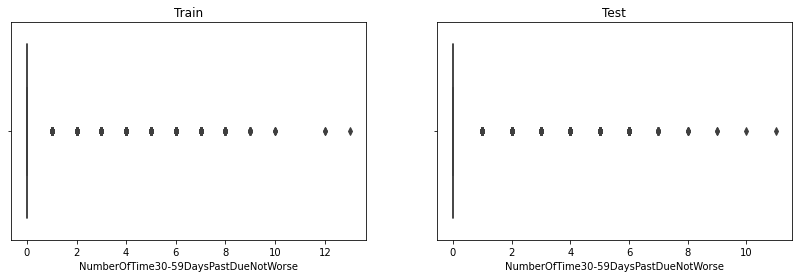

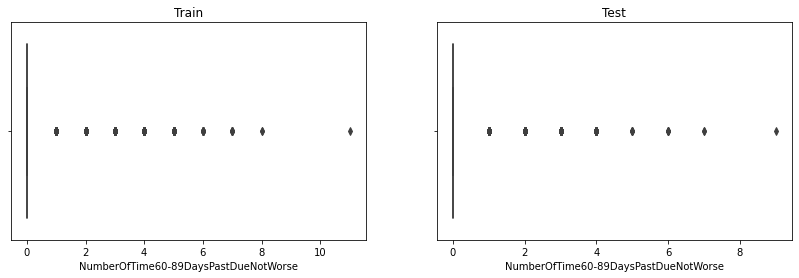

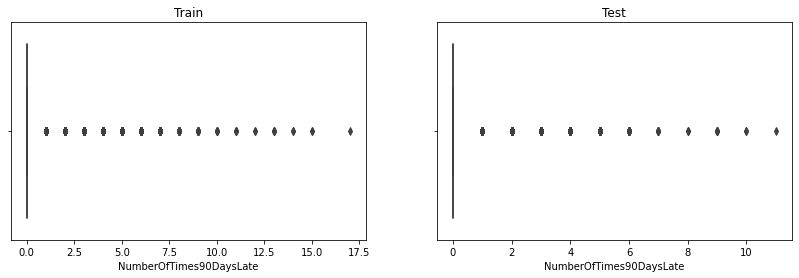

In [17]:
# After imputing

for col in cols:
    fig, ax = plt.subplots(1,2, figsize=(14,4))

    for i, dataset in enumerate([X_train, X_test]):
        sns.boxplot(data=dataset, x=col, ax=ax[i])

    ax[0].set_title("Train")
    ax[1].set_title("Test")
    plt.show()

## 1(d) Treating Age

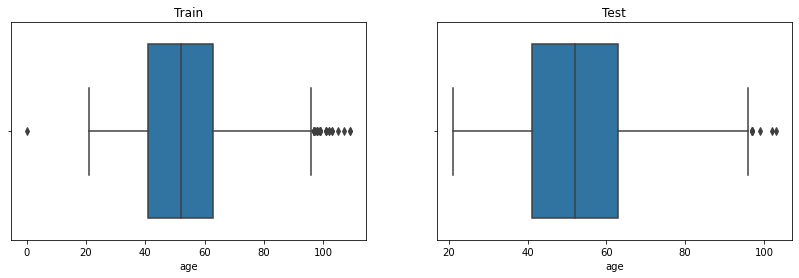

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
data_group = ["Train", "Test"]

for i, dataset in enumerate([X_train, X_test]):
    sns.boxplot(data=dataset, x="age", ax=ax[i])
    ax[i].set_title(data_group[i])
    
plt.show()

In [19]:
X_train[X_train["age"]==0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer
65695,1.0,0,1.0,0.436927,6000.0,6,0.0,2,0.0,2.0,0


It doesn't make sense for a newborn baby to have a monthly income & open credit lines. So we impute this age value with the median.

In [20]:
age_median = X_train["age"].median()
X_train["age"].replace(0, age_median, inplace=True)

# 2. Exporting Training & Test Data

In [21]:
# exporting X_train, y_train, X_test and y_test to csv

X_train.to_csv("X_train.csv")
y_train.to_csv("y_train.csv")

X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

# 3. Modelling

In [22]:
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0).squeeze()

In [23]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer
80307,0.457839,47,0.0,0.046115,67743.0,12,0.0,1,0.0,0.0,0
30226,0.009027,52,0.0,0.477691,6790.0,16,0.0,2,0.0,0.0,0
133736,0.999900,47,2.0,0.226398,7583.0,4,0.0,1,0.0,2.0,0
37286,0.190475,59,1.0,0.320860,6466.0,6,0.0,1,0.0,1.0,0
6148,0.204319,38,0.0,0.331111,6000.0,14,0.0,2,0.0,2.0,0


In [24]:
# transforming MonthlyIncome

X_train["LogMonthlyIncome"] = np.log(X_train["MonthlyIncome"]+1)

<AxesSubplot:xlabel='LogMonthlyIncome', ylabel='Count'>

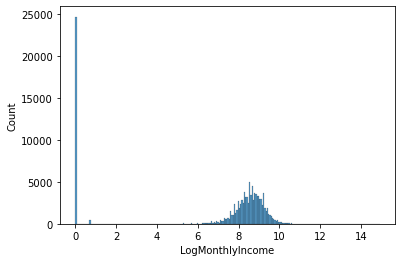

In [25]:
sns.histplot(data=X_train, x="LogMonthlyIncome")

In [26]:
# transforming RevolvingUtilizationOfUnsecuredLines

X_train["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_train["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

<AxesSubplot:xlabel='LogLogRevolvingUtilizationOfUnsecuredLines', ylabel='Count'>

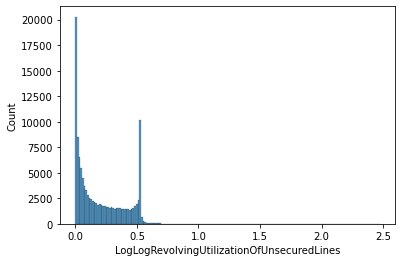

In [27]:
sns.histplot(data=X_train, x="LogLogRevolvingUtilizationOfUnsecuredLines")

In [28]:
# transforming DebtRatio

X_train["LogDebtRatio"] = np.log(X_train["DebtRatio"]+1e-05)

<AxesSubplot:xlabel='LogDebtRatio', ylabel='Count'>

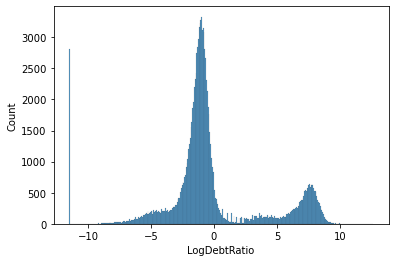

In [29]:
sns.histplot(data=X_train, x="LogDebtRatio")

## (3a) Standardizing

In [30]:
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
# Convert X_train & X_test
def scaler_transform(data, scaler):
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled

In [32]:
X_train_scaled = scaler_transform(data = X_train,
                                  scaler = scaler)

In [33]:
X_train_scaled

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer,LogMonthlyIncome,LogLogRevolvingUtilizationOfUnsecuredLines,LogDebtRatio
80307,-0.022665,-0.359114,-0.352441,-0.232311,4.359262,0.684016,-0.185818,-0.020921,-0.196823,-0.667284,-0.492793,1.228830,0.563201,-0.735964
30226,-0.024498,-0.019155,-0.352441,-0.232021,0.097846,1.462043,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.579399,-0.953422,-0.144244
133736,-0.020451,-0.359114,2.515175,-0.232190,0.153287,-0.872036,-0.185818,-0.020921,-0.196823,1.136102,-0.492793,0.610582,1.571355,-0.333241
37286,-0.023757,0.456787,1.081367,-0.232126,0.075194,-0.483023,-0.185818,-0.020921,-0.196823,0.234409,-0.492793,0.565596,-0.213128,-0.244976
6148,-0.023700,-0.971039,-0.352441,-0.232120,0.042615,1.073030,-0.185818,0.860418,-0.196823,1.136102,-0.492793,0.544481,-0.165341,-0.237015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,-0.023640,0.660762,-0.352441,-0.232025,0.112528,6.713719,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.587998,-0.115295,-0.147544
85572,-0.020450,0.864737,-0.352441,-0.232341,0.118331,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,-0.492793,0.591325,1.571499,-2.184042
118251,-0.024535,2.768504,-0.352441,-0.226981,-0.376864,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,2.029248,-1.911825,-0.997062,0.569123
95767,-0.021054,0.048836,-0.352441,-0.231911,-0.046734,0.684016,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.476864,1.344946,-0.069429


## (3b) Undersampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [35]:
# index of training observations to be bootstrapped
train_idx = X_train_scaled.index

In [36]:
from random import sample, seed

In [37]:
portion = 1 # portion of bootstrapped data from original observations
# 1 because we will further shrink it by undersampling

bootstrap_size = int(np.floor(0.3*len(X_train_scaled)))

models = {'chosen_var': [],
          'best_model': []}

for i in range(100):
    np.random.seed(i)
    seed(i)
    sampled = np.random.choice(train_idx.to_list(), size=bootstrap_size)
    cols = sample(X_train_scaled.columns.to_list(), 4)
    
    models['chosen_var'].append(cols)
    
    # sampled = train_idx.to_list()
    X_train_sampled = X_train_scaled.loc[sampled, cols]
    y_train_sampled = y_train.loc[sampled]
    rus = RandomUnderSampler(sampling_strategy = 0.3,
                             random_state = 20230703+i)
    X_res, y_res = rus.fit_resample(X_train_sampled, y_train_sampled)
    
    # compute weights
    n_samples = len(y_res)
    n_classes = len(y_res.value_counts())
    n_samples_j = y_res.value_counts()
    class_weight = n_samples / (n_classes * n_samples_j)

    tree_best = DecisionTreeClassifier(criterion = 'gini',
                                       class_weight = dict(class_weight),
                                       random_state = 20230703+i,
                                       max_depth = 5)

    tree_best.fit(X_res, y_res)
    
    models['best_model'].append(tree_best)

In [38]:
def predict_proba_avg(X, models):
    
    y_pred_proba_list = []
    
    for i, model in enumerate(models['best_model']):
        y_pred_proba = model.predict_proba(X[models['chosen_var'][i]])
        y_pred_proba_list.append(y_pred_proba)
        
    y_pred_proba_avg = np.mean(y_pred_proba_list, axis = 0)
    
    return y_pred_proba_avg

In [39]:
y_train_pred_proba = predict_proba_avg(X_train_scaled, models)

In [40]:
y_train_pred_proba

array([[0.62886293, 0.37113707],
       [0.69245644, 0.30754356],
       [0.37363982, 0.62636018],
       ...,
       [0.77577501, 0.22422499],
       [0.44257658, 0.55742342],
       [0.78991553, 0.21008447]])

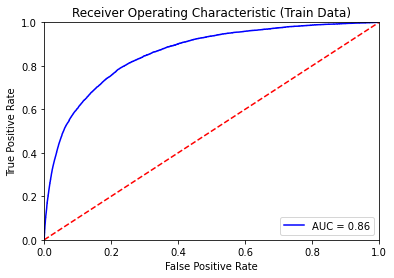

In [41]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_train_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic (Train Data)')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## (3c) Testing the Model

In [42]:
X_test = pd.read_csv("X_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0).squeeze()

X_test["LogMonthlyIncome"] = np.log(X_test["MonthlyIncome"]+1)

X_test["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_test["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

X_test["LogDebtRatio"] = np.log(X_test["DebtRatio"]+1e-05)

X_test_scaled = scaler_transform(data = X_test,
                                 scaler = scaler)

y_test_pred_proba = predict_proba_avg(X_test_scaled, models)

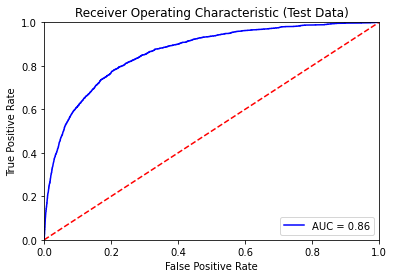

In [43]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_test_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic (Test Data)')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
# predict the class on test data

y_pred_test = (y_test_pred_proba[:,1] >= 0.5)

In [65]:
# Classification report of test data

from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["Approved", "Rejected"]))

              precision    recall  f1-score   support

    Approved       0.98      0.80      0.88     27877
    Rejected       0.22      0.77      0.34      2002

    accuracy                           0.80     29879
   macro avg       0.60      0.78      0.61     29879
weighted avg       0.93      0.80      0.84     29879



In [66]:
y_pred_test.mean()

0.23775896114327788

## (3d) Validation in Kaggle

In [46]:
X_validation = pd.read_csv("cs-test.csv")
X_validation.drop(columns=["Unnamed: 0", "SeriousDlqin2yrs"], 
                  inplace=True)
X_validation.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [47]:
null_income = X_validation["MonthlyIncome"].isna()
X_validation["TypeCustomer"] = np.where(null_income, 1, 0)
# 1 is Business
# 0 is Personal
X_validation["MonthlyIncome"] = X_validation["MonthlyIncome"].fillna(0) # fill 0 income for Business

X_validation["NumberOfDependents"] = X_validation["NumberOfDependents"].fillna(0) # impute missing values

In [48]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         101503 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    101503 non-null  float64
 10  TypeCustomer                          101503 non-null  int32  
dtype

In [49]:
X_validation["LogMonthlyIncome"] = np.log(X_validation["MonthlyIncome"]+1)

X_validation["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_validation["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

X_validation["LogDebtRatio"] = np.log(X_validation["DebtRatio"]+1e-05)

X_validation_scaled = scaler_transform(data = X_validation, scaler = scaler)

y_validation_pred_proba = predict_proba_avg(X_validation_scaled, models)[:,1]

In [50]:
y_validation_pred_proba

array([0.55493241, 0.39460898, 0.3472302 , ..., 0.2340243 , 0.47421009,
       0.44401299])

In [51]:
validation_proba = pd.Series(y_validation_pred_proba)
validation_proba.index = pd.RangeIndex(start=1, stop=101504, step=1)

In [59]:
validation_proba.to_csv("validation_random_forest.csv", index_label='Id', header=['Probability'])

In [53]:
validation_proba

1         0.554932
2         0.394609
3         0.347230
4         0.513482
5         0.589724
            ...   
101499    0.423321
101500    0.721237
101501    0.234024
101502    0.474210
101503    0.444013
Length: 101503, dtype: float64